## Importing libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import category_encoders as ce
from sklearn import set_config
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [7]:
df=pd.read_csv("quikr_car.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [9]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [11]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [12]:
df[df['kms_driven']=="Petrol"]

,name,company,year,Price,kms_driven,fuel_type
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


## Data Cleaning

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(798, 6)

In [15]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    50
fuel_type     53
dtype: int64

In [16]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [17]:
df['name']=df['name'].str.lower()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6936\2438587393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name']=df['name'].str.lower()


In [18]:
df['company']=df['company'].str.lower()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6936\2692945680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company']=df['company'].str.lower()


In [19]:
companies_to_filter = ['i', '2012', 'Well', 'all', '7', '9', 'I', 'Hindustan','Commercial', 'selling', 'URJENT','Land', 'Used', 'Sale', 'very', 'urgent', 'sell', 'Any', 'Tara', 'scratch']
# filtered_df = df[df['company'].isin(companies_to_filter)]

In [20]:
indices_to_delete = df[df['company'].isin(companies_to_filter)].index
df = df.drop(indices_to_delete)

In [21]:
years_to_filter = ['150k','TOUR','r 15','/-Rs','sale','ara)','tion', 'odel', '2 bs', 'Eon', 'emi','car', 'SALE', 'digo', 'e...', 'd...', 'o...', 'cent', 'cab','t xe', 'EV2']
filtered_df = df[df['year'].isin(years_to_filter)]
# filtered_df = df[df['company'].isin(companies_to_filter)]
indices_to_delete = df[df['year'].isin(years_to_filter)].index
df = df.drop(indices_to_delete)

In [22]:
filtered_df

,name,company,year,Price,kms_driven,fuel_type
195,"tata indigo ecs lx, 201",tata,150k,"1,50,000",NaN,NaN
206,maruti suzuki desi,maruti,TOUR,"4,00,000",NaN,NaN
294,yama,yamaha,r 15,"55,000",NaN,NaN
368,tata zest 90,tata,/-Rs,Ask For Price,NaN,NaN
385,maruti suzuki swift dzire car,maruti,sale,"3,00,000",NaN,NaN
395,maruti suzuki swift dzire tour (gat,maruti,ara),"3,00,000",NaN,NaN
414,swift dzire tour 27 dec 2016 regis,swift,tion,"3,70,000",NaN,NaN
432,tata zest x,tata,odel,"3,20,000",NaN,NaN
433,mahindra xyl,mahindra,2 bs,"3,50,000",NaN,NaN
560,hyun,hyundai,Eon,Ask For Price,NaN,NaN


In [23]:
df.index=range(0,len(df['name']))

## Price

In [24]:
df['Price'].value_counts()

Price
Ask For Price    24
2,50,000         13
1,30,000         11
3,50,000         11
1,80,000         11
                 ..
7,70,000          1
3,35,000          1
6,35,000          1
65,000            1
5,00,001          1
Name: count, Length: 274, dtype: int64

In [25]:
df[df['Price']=="Ask For Price"]

,name,company,year,Price,kms_driven,fuel_type
2,maruti suzuki alto 800 vxi,maruti,2018,Ask For Price,"22,000 kms",Petrol
5,ford ecosport titanium 1.5l tdci,ford,2015,Ask For Price,"59,000 kms",Diesel
114,maruti suzuki alto 800 lxi,maruti,2018,Ask For Price,"28,028 kms",Petrol
155,"commercial , dzire ldi, 2016, for sale",commercial,...,Ask For Price,NaN,NaN
232,maruti suzuki swift ldi,maruti,2010,Ask For Price,"52,000 kms",Diesel
238,tata indica ev2 ls,tata,2017,Ask For Price,"84,000 kms",Diesel
303,maruti suzuki alto 800 lxi,maruti,2018,Ask For Price,"24,000 kms",Petrol
357,maruti suzuki zen estilo lxi green cng,maruti,2011,Ask For Price,"16,000 kms",Petrol
403,hyundai xcent base 1.1 crdi,hyundai,2015,Ask For Price,"1,80,000 kms",Diesel
411,hyundai xcent s 1.2,hyundai,2015,Ask For Price,"35,000 kms",Petrol


In [26]:
df['Price']=df['Price'].replace('Ask For Price',0)

In [27]:
df['Price']=df['Price'].str.replace(',','')

In [28]:
df['Price']=df['Price'].fillna(0)

In [29]:
df['Price']

0       80000
1      425000
2           0
3      325000
4      575000
        ...  
755    310000
756    260000
757    390000
758    180000
759    160000
Name: Price, Length: 760, dtype: object

In [30]:
df['Price']=df['Price'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        760 non-null    object
 1   company     760 non-null    object
 2   year        760 non-null    object
 3   Price       760 non-null    int32 
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: int32(1), object(5)
memory usage: 32.8+ KB


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        760 non-null    object
 1   company     760 non-null    object
 2   year        760 non-null    object
 3   Price       760 non-null    int32 
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: int32(1), object(5)
memory usage: 32.8+ KB


## Fuel Type

In [33]:
df['fuel_type']=df['fuel_type'].fillna(df['fuel_type'].mode()[0])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        760 non-null    object
 1   company     760 non-null    object
 2   year        760 non-null    object
 3   Price       760 non-null    int32 
 4   kms_driven  748 non-null    object
 5   fuel_type   760 non-null    object
dtypes: int32(1), object(5)
memory usage: 32.8+ KB


## KMs Driven

In [35]:
df['kms_driven']

0      45,000 kms
1          40 kms
2      22,000 kms
3      28,000 kms
4      36,000 kms
          ...    
755           NaN
756    27,000 kms
757    40,000 kms
758        Petrol
759        Petrol
Name: kms_driven, Length: 760, dtype: object

In [36]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [37]:
df['kms_driven']

0       45000
1          40
2       22000
3       28000
4       36000
        ...  
755       NaN
756     27000
757     40000
758    Petrol
759    Petrol
Name: kms_driven, Length: 760, dtype: object

In [38]:
df['kms_driven']=df['kms_driven'].fillna(0)

In [39]:
df['kms_driven'].isnull().value_counts()

kms_driven
False    760
Name: count, dtype: int64

In [41]:
df['kms_driven']

0       45000
1          40
2       22000
3       28000
4       36000
        ...  
755         0
756     27000
757     40000
758    Petrol
759    Petrol
Name: kms_driven, Length: 760, dtype: object

In [42]:
df['kms_driven']=df['kms_driven'].replace('Petrol',0)

In [43]:
df['kms_driven'].isnull().sum()

0

In [44]:
df['kms_driven'].unique

<bound method Series.unique of 0      45000
1         40
2      22000
3      28000
4      36000
       ...  
755        0
756    27000
757    40000
758        0
759        0
Name: kms_driven, Length: 760, dtype: object>

In [45]:
df['kms_driven'].astype(int)

0      45000
1         40
2      22000
3      28000
4      36000
       ...  
755        0
756    27000
757    40000
758        0
759        0
Name: kms_driven, Length: 760, dtype: int32

In [46]:
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

In [47]:
m1=df['kms_driven'].mean()

In [48]:
m1

45622.288157894734

In [49]:
df['kms_driven']=df['kms_driven'].replace(0,m1)

In [50]:
df['kms_driven'].isnull().value_counts()

kms_driven
False    760
Name: count, dtype: int64

In [51]:
df['kms_driven']

0      45000.000000
1         40.000000
2      22000.000000
3      28000.000000
4      36000.000000
           ...     
755    45622.288158
756    27000.000000
757    40000.000000
758    45622.288158
759    45622.288158
Name: kms_driven, Length: 760, dtype: float64

In [52]:
df.describe()

,Price,kms_driven
count,7.600000e+02,760.000000
mean,3.877117e+05,46882.904015
std,4.746125e+05,34148.739655
min,0.000000e+00,5.000000
25%,1.554162e+05,28000.000000
50%,2.800000e+05,42000.000000
75%,4.750000e+05,58000.000000
max,8.500003e+06,400000.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        760 non-null    object 
 1   company     760 non-null    object 
 2   year        760 non-null    object 
 3   Price       760 non-null    int32  
 4   kms_driven  760 non-null    float64
 5   fuel_type   760 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 32.8+ KB


## Year

In [54]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '2003', '2004', '1995', '2002', 'SELL', '2001', 'arry',
       'Zest', 'ture', 'no.', 'd Ex', 'k...', 'r...', 'zest'],
      dtype=object)

In [55]:
df

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing xo erlx euro iii,hyundai,2007,80000,45000.000000,Petrol
1,mahindra jeep cl550 mdi,mahindra,2006,425000,40.000000,Diesel
2,maruti suzuki alto 800 vxi,maruti,2018,0,22000.000000,Petrol
3,hyundai grand i10 magna 1.2 kappa vtvt,hyundai,2014,325000,28000.000000,Petrol
4,ford ecosport titanium 1.5l tdci,ford,2014,575000,36000.000000,Diesel
...,...,...,...,...,...,...
755,ta,tara,zest,310000,45622.288158,Petrol
756,tata zest xm diesel,tata,2018,260000,27000.000000,Diesel
757,mahindra quanto c8,mahindra,2013,390000,40000.000000,Diesel
758,honda amaze 1.2 e i vtec,honda,2014,180000,45622.288158,Petrol


In [56]:
# errors='coerce' will convert non-numeric values to NaN
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Replace NaN with '0'
df['year'] = df['year'].fillna(0).astype(int)

In [57]:
df['year']=df['year'].replace(0,df['year'].mode()[0])

In [58]:
df['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        760 non-null    object 
 1   company     760 non-null    object 
 2   year        760 non-null    int32  
 3   Price       760 non-null    int32  
 4   kms_driven  760 non-null    float64
 5   fuel_type   760 non-null    object 
dtypes: float64(1), int32(2), object(3)
memory usage: 29.8+ KB


In [60]:
df['Price']

0       80000
1      425000
2           0
3      325000
4      575000
        ...  
755    310000
756    260000
757    390000
758    180000
759    160000
Name: Price, Length: 760, dtype: int32

## EDA

Kernel Density Estimate (KDE) Plot is a powerful tool for estimating the probability density function of continuous or non-parametric data. KDE plot is implemented through the kdeplot function in Seaborn

<Axes: xlabel='year', ylabel='Density'>

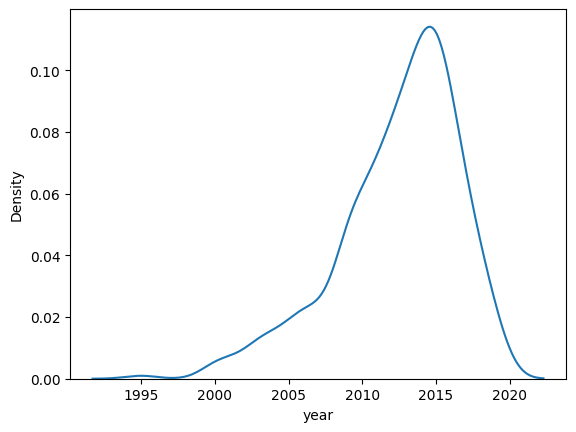

In [61]:
sns.kdeplot(df['year'])

Relational Plots are used for visualizing the statistical relationship between the data points.

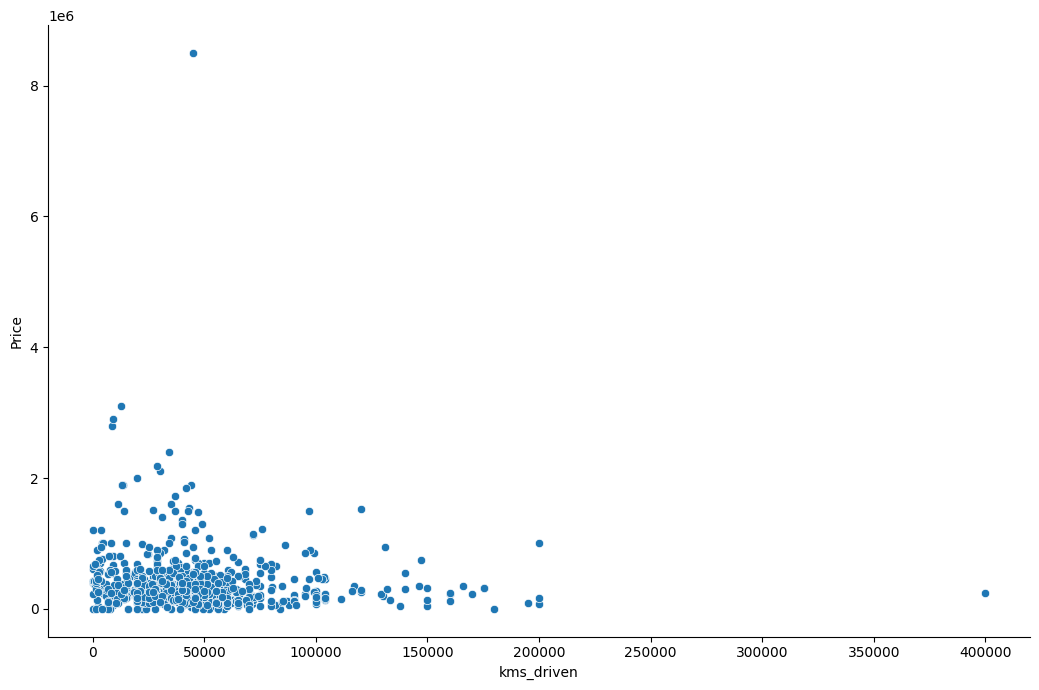

In [62]:
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

<Axes: xlabel='kms_driven', ylabel='Density'>

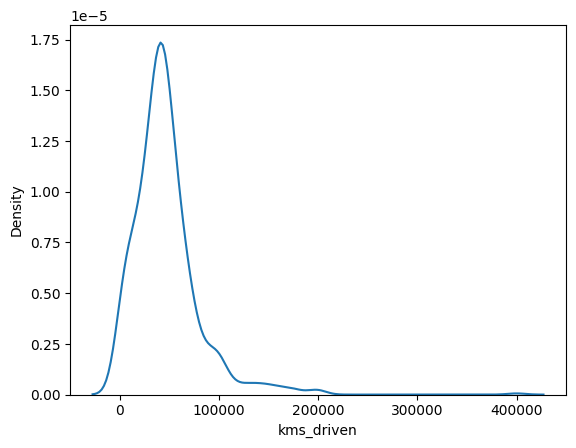

In [63]:
sns.kdeplot(df['kms_driven'])

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.

<Axes: ylabel='kms_driven'>

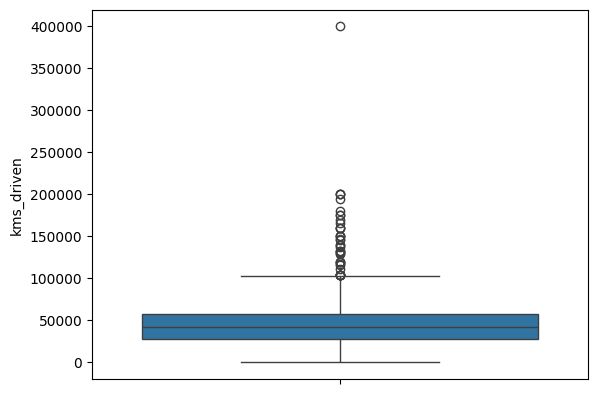

In [64]:
sns.boxplot(df['kms_driven'])

## Funtions to be usd in pipeline


One-Hot Encoder : One-hot encoding is a technique in machine learning that turns categorical data, like colors (red, green, blue), into numerical data for machines to understand. It creates new binary columns for each category, with a 1 marking the presence of that category and 0s elsewhere.

In [65]:
encoder = OneHotEncoder(sparse_output=False)

ROBUST SCALING : It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile . i.e., in between 25th quantile and 75th quantile range

In [66]:

robustscaler=RobustScaler()
robustscaler.fit(df[['kms_driven']])

RobustScaler()

## User-defined functions


In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
    
    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        # Apply log transformation to the specified column
        X_copy = X.copy()
        X_copy[self.column_name] = np.log(X_copy[self.column_name].astype(float))
        return X_copy


In [68]:


class DebugTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, name):
        self.name = name

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        print(f"After '{self.name}':")
        print(X[:5])  # Print the first 5 rows for brevity
        return X

In [103]:
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
    
    def fit(self, X, y=None):
        # Compute quantiles and IQR during fit
        self.quantile1, self.quantile3= np.percentile(X[self.column_name], [25, 75])
        self.iqr = self.quantile3 - self.quantile1
        self.lb = self.quantile1 - (1.5 * self.iqr)
        self.ub = self.quantile3 + (1.5 * self.iqr)
        return self
    
    def transform(self, X):
        # Apply the bounds
        X[self.column_name] = np.where(X[self.column_name] < self.lb, self.lb,
                                        np.where(X[self.column_name] > self.ub, self.ub, X[self.column_name]))
        return X


## Pipeline

A Machine Learning pipeline is a process of automating the workflow of a complete machine learning task. It means that in the pipeline, each step is designed as an independent module, and all these modules are tied together to get the final result.



In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# Define the pipeline with corrected syntax
Pipe = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            # Processing categorical features
            (
                'cat', ce.TargetEncoder(),  # Target encode categorical features
                ['company', 'name']
            ),
            # Processing numerical features
            (
                'num', ColumnTransformer(
                    transformers=[
                        ('kms_driven', Pipeline(
                            steps=[
                                ('outlier_handler', OutlierHandler(column_name='kms_driven')),  # Handle outliers
                                # ('scaler', RobustScaler()),  # Scale numerical feature kms_driven
                                ('LogTransformer', LogTransformer(column_name='kms_driven'))  # Apply log transformation
                            ]
                        ), ['kms_driven']),
                        ('year', Pipeline(
                            steps=[
                                ('scaler', StandardScaler())  # Scale numerical feature year
                            ]
                        ), ['year'])
                    ],
                    # remainder='passthrough'  # Pass through any columns not specified in the transformers
                ),
                ['kms_driven', 'year']
            ),
            # One-Hot Encode the 'fuel_type' column
            (
                'fuel_type', OneHotEncoder(), ['fuel_type']
            )
        ],
        remainder='passthrough'  # Pass through any columns not specified in the transformers
    )),
    # Debugger Layer
    (
        "debugger", DebugTransformer("Debugger")
    ),
    ('model', LinearRegression())  # Linear Regression model
])

In [71]:
## Visualise pipeline
set_config(display="diagram")


## Splitting the data

Splitting the data into 2 parts : train(80 %) and test (20%)

In [72]:
X=df[['name','company','kms_driven','fuel_type','year']]
Y=df['Price']

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [74]:
Pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', TargetEncoder(),
                                                  ['company', 'name']),
                                                 ('num',
                                                  ColumnTransformer(transformers=[('kms_driven',
                                                                                   Pipeline(steps=[('outlier_handler',
                                                                                                    OutlierHandler(column_name='kms_driven')),
                                                                                                   ('LogTransformer',
                                                                                                    LogTransformer(column_name='kms_driven'))]),
                                                                                   ['kms_driven']),
                                                                                  ('year',
                                                                                   Pipeline(steps=[('scaler',
                                                                                                    StandardScaler())]),
                                                                                   ['year'])]),
                                                  ['kms_driven', 'year']),
                                                 ('fuel_type', OneHotEncoder(),
                                                  ['fuel_type'])])),
                ('debugger', DebugTransformer(name='Debugger')),
                ('model', LinearRegression())])

The .fit() method is used to train a model or transformer on the training data. For models, it involves learning the parameters from the data, while for transformers, it involves learning the statistics or parameters needed to transform the data.



The .transform() method is used with transformers to apply the learned transformation to the data. This method is usually called after .fit() and is used to prepare data for modeling or prediction.

The .fit_transform() method combines .fit() and .transform() into a single call. It first fits the transformer on the data and then applies the transformation. This is particularly useful when you need to both fit and transform the same dataset.

In [75]:
Pipe.fit(X_train,Y_train)

After 'Debugger':
[[ 3.12296130e+05  3.41145756e+05  8.85366543e+00  1.57371130e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.03360436e+05  3.45309227e+05  1.06920585e+01 -6.01970418e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 2.03360436e+05  3.58059858e+05  1.11844214e+01 -1.18485591e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.55878416e+05  3.66516908e+05  1.08197783e+01  3.64999236e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.60315198e+05  4.29542979e+05  8.00636757e+00  1.09022648e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', TargetEncoder(),
                                                  ['company', 'name']),
                                                 ('num',
                                                  ColumnTransformer(transformers=[('kms_driven',
                                                                                   Pipeline(steps=[('outlier_handler',
                                                                                                    OutlierHandler(column_name='kms_driven')),
                                                                                                   ('LogTransformer',
                                                                                                    LogTransformer(column_name='kms_driven'))]),
                                                                                   ['kms_driven']),
                                                                                  ('year',
                                                                                   Pipeline(steps=[('scaler',
                                                                                                    StandardScaler())]),
                                                                                   ['year'])]),
                                                  ['kms_driven', 'year']),
                                                 ('fuel_type', OneHotEncoder(),
                                                  ['fuel_type'])])),
                ('debugger', DebugTransformer(name='Debugger')),
                ('model', LinearRegression())])

The .predict() method is used to make predictions on new or unseen data. It uses the model that was trained with .fit() to make predictions.

In [76]:
y_pred=Pipe.predict(X_train)

After 'Debugger':
[[ 3.12296130e+05  3.41145756e+05  8.85366543e+00  1.57371130e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.03360436e+05  3.45309227e+05  1.06920585e+01 -6.01970418e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 2.03360436e+05  3.58059858e+05  1.11844214e+01 -1.18485591e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.55878416e+05  3.66516908e+05  1.08197783e+01  3.64999236e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.60315198e+05  4.29542979e+05  8.00636757e+00  1.09022648e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [77]:
Y_train

693         0
361     32000
266    130000
90     195000
368    750000
        ...  
71     600000
106    220000
270    600000
435    350000
102    179000
Name: Price, Length: 608, dtype: int32

In [78]:
df['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [79]:
y_pred

array([ 7.46465674e+04,  6.01874033e+04,  1.46762366e+05,  2.12097240e+05,
        6.98271420e+05,  2.82084166e+05,  7.56494354e+04,  8.22020571e+04,
        4.02915792e+04,  2.90841693e+05,  5.09086062e+05,  1.67870028e+05,
        6.61184488e+05,  2.97684961e+04,  2.68839190e+05,  3.97617843e+05,
        3.21618464e+05,  8.82575826e+04,  2.06820630e+05,  3.36966092e+05,
        1.36952220e+05,  1.83672794e+05,  1.99818364e+05,  1.60182558e+05,
        3.60125912e+05,  5.46726701e+05,  1.41243354e+06,  1.60897493e+06,
        8.76531893e+04,  1.89284224e+05,  7.94203628e+05,  3.08204100e+05,
        1.34417033e+05,  4.80481209e+05,  1.49923510e+05,  1.13868840e+05,
        3.08728833e+05,  1.68278369e+05,  1.92000889e+05,  1.99373392e+05,
        8.98466362e+04,  7.60725306e+05,  2.95718688e+05,  3.84378588e+05,
        2.13473228e+05,  1.84939722e+05,  2.80181948e+05,  3.55336300e+05,
        1.43093162e+05,  2.59580867e+05,  1.98552164e+05,  1.39456721e+05,
        2.13535148e+05,  

### R2 Score : It is a measure that provides information about the goodness of fit of a model.

1 - [ (sum squared regression (SSR)) /(total sum of squares (SST))]

In [102]:
r2_score(Y_train,y_pred)

0.6975663225835108

In [81]:
new_data = pd.DataFrame({
    'company': ['Hyundai'],
    'name': ['Hyundai Santro Xing XO eRLX Euro III'],
    'kms_driven': [50000],
    'fuel_type': ['Petrol'],
    'year': [2007]
})


In [82]:
# Make predictions
predictions = Pipe.predict(new_data)

After 'Debugger':
[[ 3.92170456e+05  3.92170456e+05  1.08197783e+01 -1.32719766e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [83]:
print(predictions)

[373208.13474971]


##  Decision tree

A decision tree is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.To overcome overfitting, pruning techniques are used.

In [84]:
PipeDecisionTree = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            # Processing categorical features
            (
                'cat', ce.TargetEncoder(),  # Target encode categorical features
                ['company', 'name']
            ),
            # Processing 'kms_driven' feature
            (
                'kms_driven', Pipeline([
                    ('outlier_handler', OutlierHandler(column_name='kms_driven')),  # Handle outliers
                    ('LogTransformer', LogTransformer(column_name='kms_driven'))  # Apply log transformation
                ]),
                ['kms_driven']
            ),
            # Processing 'year' feature
            (
                'year', StandardScaler(),  # Scale numerical feature 'year'
                ['year']
            ),
            # One-Hot Encode the 'fuel_type' column
            (
                'fuel_type', OneHotEncoder(), 
                ['fuel_type']
            )
        ],
        remainder='passthrough'  # Pass through any columns not specified in the transformers
    )),
    # Debugger Layer
    (
        "debugger", DebugTransformer("Debugger")
    ),
    # Model Layer
    (
        'model', DecisionTreeRegressor(splitter='best',
                                       max_depth=15,
                                       min_samples_leaf=35,
                                       ccp_alpha=0.1)
    )
])

# Now you can fit your pipeline
PipeDecisionTree.fit(X_train, Y_train)


After 'Debugger':
[[ 3.12296130e+05  3.41145756e+05  8.85366543e+00  1.57371130e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.03360436e+05  3.45309227e+05  1.06920585e+01 -6.01970418e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 2.03360436e+05  3.58059858e+05  1.11844214e+01 -1.18485591e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.55878416e+05  3.66516908e+05  1.08197783e+01  3.64999236e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.60315198e+05  4.29542979e+05  8.00636757e+00  1.09022648e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', TargetEncoder(),
                                                  ['company', 'name']),
                                                 ('kms_driven',
                                                  Pipeline(steps=[('outlier_handler',
                                                                   OutlierHandler(column_name='kms_driven')),
                                                                  ('LogTransformer',
                                                                   LogTransformer(column_name='kms_driven'))]),
                                                  ['kms_driven']),
                                                 ('year', StandardScaler(),
                                                  ['year']),
                                                 ('fuel_type', OneHotEncoder(),
                                                  ['fuel_type'])])),
                ('debugger', DebugTransformer(name='Debugger')),
                ('model',
                 DecisionTreeRegressor(ccp_alpha=0.1, max_depth=15,
                                       min_samples_leaf=35))])

In [86]:
PipeDecisionTree.score(X_test,Y_test)

After 'Debugger':
[[ 2.60489950e+05  3.92170456e+05  8.70284254e+00  3.64999236e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 6.27266721e+05  3.92170456e+05  1.10821425e+01 -1.18485591e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.60489950e+05  3.92170456e+05  1.14982813e+01  6.06741650e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.64565281e+05  3.92170456e+05  1.07281517e+01  6.06741650e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 3.60315198e+05  4.12575308e+05  1.04631033e+01 -6.01970418e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


0.2539327663027173

In [87]:
new_data = pd.DataFrame({
    'company': ['Hyundai'],
    'name': ['Hyundai Santro Xing XO eRLX Euro III'],
    'kms_driven': [50000],
    'fuel_type': ['Petrol'],
    'year': [2007]
})


In [88]:
predictions = Pipe.predict(new_data)

After 'Debugger':
[[ 3.92170456e+05  3.92170456e+05  1.08197783e+01 -1.32719766e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [89]:
predictions

array([373208.13474971])

## Polynomial Regression.

In polynomial regression, we describe the relationship between the independent variable x and the dependent variable y using an nth-degree polynomial in x. Polynomial regression, denoted as E(y | x), characterizes fitting a nonlinear relationship between the x value and the conditional mean of y. 

In [90]:
polynomial_features = PolynomialFeatures(degree=4)  

In [91]:
PolyPipe = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            # Processing categorical features
            (
                'cat', ce.TargetEncoder(),  # Target encode categorical features
                ['company', 'name']
            ),
            # Processing numerical features
            (
                'num', ColumnTransformer(
                    transformers=[
                        ('kms_driven', Pipeline(
                            steps=[
                                ('outlier_handler', OutlierHandler(column_name='kms_driven')),  # Handle outliers
                                # ('scaler', RobustScaler()),  # Scale numerical feature kms_driven
                                ('LogTransformer', LogTransformer(column_name='kms_driven'))  # Apply log transformation
                            ]
                        ), ['kms_driven']),
                        ('year', Pipeline(
                            steps=[
                                ('scaler', StandardScaler())  # Scale numerical feature year
                            ]
                        ), ['year'])
                    ],
                    remainder='passthrough'  # Pass through any columns not specified in the transformers
                ),
                ['kms_driven', 'year']
            ),
            # One-Hot Encode the 'fuel_type' column
            (
                'fuel_type', OneHotEncoder(), ['fuel_type']
            )
        ],
        remainder='passthrough'  # Pass through any columns not specified in the transformers
    )),
    # Debugger Layer
    (
        "debugger", DebugTransformer("Debugger")
    ),
    ("polynomial_features", polynomial_features),
    ('model', LinearRegression())  # Linear Regression model
])

In [92]:
PolyPipe.fit(X_train,Y_train)

After 'Debugger':
[[ 3.12296130e+05  3.41145756e+05  8.85366543e+00  1.57371130e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.03360436e+05  3.45309227e+05  1.06920585e+01 -6.01970418e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 2.03360436e+05  3.58059858e+05  1.11844214e+01 -1.18485591e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.55878416e+05  3.66516908e+05  1.08197783e+01  3.64999236e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.60315198e+05  4.29542979e+05  8.00636757e+00  1.09022648e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', TargetEncoder(),
                                                  ['company', 'name']),
                                                 ('num',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('kms_driven',
                                                                                   Pipeline(steps=[('outlier_handler',
                                                                                                    OutlierHandler(column_name='kms_driven')),
                                                                                                   ('LogTransformer',
                                                                                                    LogTransformer(column_name='kms_driven'))]),
                                                                                   ['kms_driven']),
                                                                                  ('year',
                                                                                   Pipeline(steps=[('scaler',
                                                                                                    StandardScaler())]),
                                                                                   ['year'])]),
                                                  ['kms_driven', 'year']),
                                                 ('fuel_type', OneHotEncoder(),
                                                  ['fuel_type'])])),
                ('debugger', DebugTransformer(name='Debugger')),
                ('polynomial_features', PolynomialFeatures(degree=4)),
                ('model', LinearRegression())])

In [93]:
y_pred=Pipe.predict(X_train)

After 'Debugger':
[[ 3.12296130e+05  3.41145756e+05  8.85366543e+00  1.57371130e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.03360436e+05  3.45309227e+05  1.06920585e+01 -6.01970418e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 2.03360436e+05  3.58059858e+05  1.11844214e+01 -1.18485591e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.55878416e+05  3.66516908e+05  1.08197783e+01  3.64999236e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.60315198e+05  4.29542979e+05  8.00636757e+00  1.09022648e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [94]:
r2_score(Y_train,y_pred)

0.6975663225835108

In [95]:
new_data = pd.DataFrame({
    'company': ['Hyundai'],
    'name': ['Hyundai Santro Xing XO eRLX Euro III'],
    'kms_driven': [50000],
    'fuel_type': ['Petrol'],
    'year': [2007]
})


In [96]:
predictions = Pipe.predict(new_data)

After 'Debugger':
[[ 3.92170456e+05  3.92170456e+05  1.08197783e+01 -1.32719766e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [97]:
predictions

array([373208.13474971])

In [98]:
import pickle
with open("new_pickle.pkl",'wb') as file:
    pickle.dump(Pipe,file)
    

In [99]:
with open('new_pickle.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [100]:
loaded_pipeline.predict(new_data)

After 'Debugger':
[[ 3.92170456e+05  3.92170456e+05  1.08197783e+01 -1.32719766e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


array([373208.13474971])

In [101]:
Pipe.predict(new_data)

After 'Debugger':
[[ 3.92170456e+05  3.92170456e+05  1.08197783e+01 -1.32719766e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]]


array([373208.13474971])